# Домашнее задание 2 - предобработка признаков, pandas


### О задании

Практическое задание 2 посвящено изучению основных библиотек для анализа данных, а также линейных моделей и методов их обучения. Вы научитесь:
 * применять библиотеки NumPy и Pandas для осуществления желаемых преобразований;
 * подготавливать данные для обучения линейных моделей;
 * обучать линейную, Lasso и Ridge-регрессии при помощи модуля scikit-learn;
 * реализовывать обычный и стохастический градиентные спуски;
 * обучать линейную регрессию для произвольного функционала качества.
 

### Оценивание и штрафы

Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Кроме того, некоторые из заданий являются опциональными (необязательными), однако за их выполнение можно получить дополнительные баллы, которые позднее будут учитываться при проставлении оценок автоматом по курсу.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов. Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце Вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник). 

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Для сдачи задания получившийся файл \*.ipynb с решением необходимо выложить в свой репозиторий github.

## Библиотеки для анализа данных

### NumPy

Во всех заданиях данного раздела запрещено использовать циклы  и list comprehensions. Под вектором и матрицей в данных заданиях понимается одномерный и двумерный numpy.array соответственно.

In [2]:
import numpy as np

**1. (0.2 балла)** Реализуйте функцию, возвращающую максимальный элемент в векторе x среди элементов, перед которыми стоит нулевой. Для x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) ответом является 5. Если нулевых элементов нет, функция должна возвращать None.


In [3]:
def max_element(x):
    zero_indices = np.where(x[:-1] == 0)[0]
    
    if len(zero_indices) == 0:
        return None
    
    elements_after_zero = x[zero_indices + 1]
    max_value = np.max(elements_after_zero)
    
    return max_value


# Проверка с нулями
x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])
result = max_element(x)
print(f"Результат с нулями: {result}")

# Проверка без нулей
x_no_zero = np.array([1, 2, 3, 4, 5])
result_no_zero = max_element(x_no_zero)
print(f"Результат без нулей: {result_no_zero}")

Результат с нулями: 5
Результат без нулей: None


**2. (0.2 балла)** Реализуйте функцию, принимающую на вход матрицу и некоторое число и возвращающую ближайший к числу элемент матрицы. Например: для X = np.arange(0,10).reshape((2, 5)) и v = 3.6 ответом будет 4.

In [4]:
def nearest_value(X, v):
    differences = np.abs(X - v)
    
    min_difference = np.min(differences)
    
    nearest_elements = X[differences == min_difference]
    
    return nearest_elements[0]


X = np.arange(0, 10).reshape((2, 5))
v = 3.6
result = nearest_value(X, v)
print(f"Матрица:\n{X}")
print(f"Число: {v}")
print(f"Ближайший элемент: {result}")

Матрица:
[[0 1 2 3 4]
 [5 6 7 8 9]]
Число: 3.6
Ближайший элемент: 4


**3. (0.2 балла)** Реализуйте функцию scale(X), которая принимает на вход матрицу и масштабирует каждый ее столбец (вычитает выборочное среднее и делит на стандартное отклонение). Убедитесь, что в функции не будет происходить деления на ноль. Протестируйте на случайной матрице (для её генерации можно использовать, например, функцию [numpy.random.randint](http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.randint.html)).

In [8]:
def scale(X):
    column_means = np.mean(X, axis=0)
    
    column_stds = np.std(X, axis=0, ddof=1)
    
    column_stds_safe = np.where(column_stds == 0, 1, column_stds)
    
    X_scaled = (X - column_means) / column_stds_safe
    
    return X_scaled


def test_scale():
    
    print("Тест 1: Случайная матрица")
    np.random.seed(44)
    X1 = np.random.randint(0, 25, size=(5, 3))
    print(f"Исходная матрица:\n{X1}")
    X1_scaled = scale(X1)
    print(f"Масштабированная матрица:\n{X1_scaled}")
    print(f"Средние столбцов после масштабирования: {np.mean(X1_scaled, axis=0)}")
    print(f"Стандартные отклонения столбцов после масштабирования: {np.std(X1_scaled, axis=0, ddof=1)}")
    
    print("Тест 2: Матрица с постоянными столбцами (std=0)")
    X2 = np.array([[1, 5, 10],
                   [1, 5, 10],
                   [1, 5, 10]])
    print(f"Исходная матрица:\n{X2}")
    X2_scaled = scale(X2)
    print(f"Масштабированная матрица:\n{X2_scaled}")
    print(f"После масштабирования постоянные столбцы должны быть нулевыми: {np.allclose(X2_scaled[:, 0], 0)}")
    
    print("Тест 3: Матрица с разными дисперсиями")
    X3 = np.array([[1, 100, 10000],
                   [2, 200, 20000],
                   [3, 300, 30000]])
    print(f"Исходная матрица:\n{X3}")
    X3_scaled = scale(X3)
    print(f"Масштабированная матрица:\n{X3_scaled}")
    print(f"Средние столбцов: {np.mean(X3_scaled, axis=0)}")
    print(f"Стандартные отклонения столбцов: {np.std(X3_scaled, axis=0, ddof=1)}")
    
    print("Тест 4: Большая случайная матрица")
    X4 = np.random.randn(100, 50) * 10 + 5 
    X4_scaled = scale(X4)
    print(f"Средства масштабированных столбцов (должны быть близки к 0):")
    print(f"  Максимальное среднее: {np.max(np.abs(np.mean(X4_scaled, axis=0))):.6f}")
    print(f"Стандартные отклонения масштабированных столбцов (должны быть близки к 1):")
    print(f"  Min std: {np.min(np.std(X4_scaled, axis=0, ddof=1)):.6f}")
    print(f"  Max std: {np.max(np.std(X4_scaled, axis=0, ddof=1)):.6f}")
    print(f"  Среднее std: {np.mean(np.std(X4_scaled, axis=0, ddof=1)):.6f}")

test_scale()

Тест 1: Случайная матрица
Исходная матрица:
[[20  3 17]
 [13  3  0]
 [20  3 15]
 [10 24 23]
 [23 22  3]]
Масштабированная матрица:
[[ 0.51378309 -0.72878003  0.55461242]
 [-0.77067464 -0.72878003 -1.19138964]
 [ 0.51378309 -0.72878003  0.34920041]
 [-1.32115652  1.18426755  1.17084844]
 [ 1.06426497  1.00207254 -0.88327163]]
Средние столбцов после масштабирования: [8.88178420e-17 0.00000000e+00 6.66133815e-17]
Стандартные отклонения столбцов после масштабирования: [1. 1. 1.]
Тест 2: Матрица с постоянными столбцами (std=0)
Исходная матрица:
[[ 1  5 10]
 [ 1  5 10]
 [ 1  5 10]]
Масштабированная матрица:
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
После масштабирования постоянные столбцы должны быть нулевыми: True
Тест 3: Матрица с разными дисперсиями
Исходная матрица:
[[    1   100 10000]
 [    2   200 20000]
 [    3   300 30000]]
Масштабированная матрица:
[[-1. -1. -1.]
 [ 0.  0.  0.]
 [ 1.  1.  1.]]
Средние столбцов: [0. 0. 0.]
Стандартные отклонения столбцов: [1. 1. 1.]
Тест 4: Большая случа

**4. (0.2 балла)** Реализуйте функцию, которая для заданной матрицы находит:
 - определитель
 - след
 - наименьший и наибольший элементы
 - норму Фробениуса
 - собственные числа
 - обратную матрицу

Для тестирования сгенерируйте матрицу с элементами из нормального распределения $\mathcal{N}$(10,1)

In [23]:
import numpy as np

def get_stats(X):
    determinant = np.linalg.det(X)
    trace = np.trace(X)
    min_element = np.min(X)
    max_element = np.max(X)
    frobenius_norm = np.linalg.norm(X, 'fro')
    eigenvalues = np.linalg.eigvals(X)
    inverse_matrix = np.linalg.inv(X)
    
    return determinant, trace, min_element, max_element, frobenius_norm, eigenvalues, inverse_matrix

# Тестирование
np.random.seed(24)
X = np.random.normal(loc=10, scale=1, size=(5, 5))
results = get_stats(X)

print(f"Определитель: {results[0]}")
print(f"След: {results[1]}")
print(f"Наименьший элемент: {results[2]}")
print(f"Наибольший элемент: {results[3]}")
print(f"Норма Фробениуса: {results[4]}")
print(f"Собственные числа: {results[5]}")
print(f"Обратная матрица:\n{results[6]}")

Определитель: 48.859330623275405
След: 53.142397391539966
Наименьший элемент: 8.373595766689315
Наибольший элемент: 11.889272731415282
Норма Фробениуса: 51.03540501353444
Собственные числа: [50.7719429 +0.j          2.60712618+0.j         -0.28546145+1.01134361j
 -0.28546145-1.01134361j  0.3342512 +0.j        ]
Обратная матрица:
[[ 0.38406476  0.14379829  0.11505071 -0.36776834 -0.21014309]
 [-0.36199078  0.16201409  0.4852913   0.0735124  -0.37699549]
 [ 0.81430746  0.66735002  0.6821017  -2.48863619  0.55169897]
 [-0.61354498 -1.11421792 -0.53863362  1.84755997  0.25344792]
 [-0.26519451  0.0505381  -0.84389411  1.22544747 -0.19771652]]


**5. (0.2 балла)** Повторите 100 раз следующий эксперимент: сгенерируйте две матрицы размера 10×10 из стандартного нормального распределения, перемножьте их (как матрицы) и найдите максимальный элемент. Какое среднее значение по экспериментам у максимальных элементов? 95-процентная квантиль?

In [24]:
np.random.seed(24)
max_elements = []

for exp_num in range(100):
    A = np.random.randn(10, 10)
    B = np.random.randn(10, 10)
    C = A @ B
    max_elements.append(np.max(C))

max_elements = np.array(max_elements)
mean_value = np.mean(max_elements)
quantile_95 = np.percentile(max_elements, 95)

print(f"Среднее значение максимальных элементов: {mean_value}")
print(f"95-процентная квантиль: {quantile_95}")

Среднее значение максимальных элементов: 8.54754485611406
95-процентная квантиль: 11.700505677647046


### Pandas

![](https://metrouk2.files.wordpress.com/2015/10/panda.jpg)

#### Ответьте на вопросы о данных по авиарейсам в США за январь-апрель 2008 года.

Данные находятся в приложенном файле `2008.csv`. Их [описание](http://stat-computing.org/dataexpo/2009/the-data.html) приведено ниже:

Airline on-time performance

Have you ever been stuck in an airport because your flight was delayed or cancelled and wondered if you could have predicted it if you'd had more data? This is your chance to find out.

The data
The data set is available for download here.
The data consists of flight arrival and departure details for all commercial flights within the USA, from October 1987 to April 2008. This is a large dataset: there are nearly 120 million records in total, and takes up 1.6 gigabytes of space compressed and 12 gigabytes when uncompressed.

Understanding and preparing the data
In order to answer above questions, we are going to analyze the provided dataset, containing up to 1936758 ### different internal flights in the US for 2008 and their causes for delay, diversion and cancellation

The data comes from the U.S. Department of Transportation’s (DOT) Bureau of Transportation Statistics (BTS). Meta data explanations

This dataset is composed by the following variables:

**Year** 2008 **Month** 1-12 **DayofMonth** 1-31 **DayOfWeek** 1 (Monday) - 7 (Sunday)  
**DepTime** actual departure time (local, hhmm)  
**CRSDepTime** scheduled departure time (local, hhmm)  
**ArrTime** actual arrival time (local, hhmm)  
**CRSArrTime** scheduled arrival time (local, hhmm)  
**UniqueCarrier** unique carrier code  
**FlightNum** flight number  
**TailNum** plane tail number: aircraft registration, unique aircraft identifier  
**ActualElapsedTime** in minutes  
**CRSElapsedTime** in minutes  
**AirTime** in minutes  
**ArrDelay** arrival delay, in minutes: A flight is counted as “on time” if it operated less than 15 minutes later the scheduled time shown in the carriers’ Computerized Reservations Systems (CRS).  
**DepDelay** departure delay, in minutes  
**Origin** origin IATA airport code  
**Dest** destination IATA airport code  
**Distance** in miles  
**TaxiIn** taxi in time, in minutes  
**TaxiOut** taxi out time in minutes  
**Cancelled** *was the flight cancelled  
**CancellationCode** reason for cancellation (A = carrier, B = weather, C = NAS, D = security)  
**Diverted** 1 = yes, 0 = no  
**CarrierDelay** in minutes: Carrier delay is within the control of the air carrier. Examples of occurrences that may determine carrier delay are: aircraft cleaning, aircraft damage, awaiting the arrival of connecting passengers or crew, baggage, bird strike, cargo loading, catering, computer, outage-carrier equipment, crew legality (pilot or attendant rest), damage by hazardous goods, engineering inspection, fueling, handling disabled passengers, late crew, lavatory servicing, maintenance, oversales, potable water servicing, removal of unruly passenger, slow boarding or seating, stowing carry-on baggage, weight and balance delays.  
**WeatherDelay** in minutes: Weather delay is caused by extreme or hazardous weather conditions that are forecasted or manifest themselves on point of departure, enroute, or on point of arrival.  
**NASDelay** in minutes: Delay that is within the control of the National Airspace System (NAS) may include: non-extreme weather conditions, airport operations, heavy traffic volume, air traffic control, etc.  
**SecurityDelay** in minutes: Security delay is caused by evacuation of a terminal or concourse, re-boarding of aircraft because of security breach, inoperative screening equipment and/or long lines in excess of 29 minutes at screening areas.  
**LateAircraftDelay** in minutes: Arrival delay at an airport due to the late arrival of the same aircraft at a previous airport. The ripple effect of an earlier delay at downstream airports is referred to as delay propagation.

In [4]:
import pandas as pd
%matplotlib inline

**6. (0.3 балла)** Какая из причин отмены рейса (`CancellationCode`) была самой частой? (расшифровки кодов можно найти в описании данных)

In [42]:
df = pd.read_csv('2008.csv')

most_common_cancellation = df['CancellationCode'].dropna().mode()[0]

cancellation_codes = {
    'A': 'Carrier (авиакомпания)',
    'B': 'Weather (погода)',
    'C': 'NAS (национальная система воздушного пространства)',
    'D': 'Security (безопасность)'
}

print(f"Самая частая причина отмены рейса: {most_common_cancellation} - {cancellation_codes[most_common_cancellation]}")

Самая частая причина отмены рейса: A - Carrier (авиакомпания)


**7. (0.3 балла)** Найдите среднее, минимальное и максимальное расстояние, пройденное самолетом.

In [41]:
df = pd.read_csv('2008.csv')

mean_distance = df['Distance'].mean()
min_distance = df['Distance'].min()
max_distance = df['Distance'].max()

print(f"Среднее расстояние: {mean_distance} миль")
print(f"Минимальное расстояние: {min_distance} миль")
print(f"Максимальное расстояние: {max_distance} миль")

Среднее расстояние: 724.5082571428571 миль
Минимальное расстояние: 31 миль
Максимальное расстояние: 4962 миль


**8. (0.3 балла)** Не выглядит ли подозрительным минимальное пройденное расстояние? В какие дни и на каких рейсах оно было? Какое расстояние было пройдено этими же рейсами в другие дни?

In [40]:
df = pd.read_csv('2008.csv')

min_distance = df['Distance'].min()

min_distance_flights = df[df['Distance'] == min_distance]

print(f"Минимальное пройденное расстояние: {min_distance} миль")
print(f"Количество рейсов с таким расстоянием: {len(min_distance_flights)}")
print("\nИнформация о рейсах с минимальным расстоянием:")
print(min_distance_flights[['Year', 'Month', 'DayofMonth', 'UniqueCarrier', 'FlightNum', 'Origin', 'Dest', 'Distance']])

unique_flights = min_distance_flights[['UniqueCarrier', 'FlightNum']].drop_duplicates()

print("\nУникальные рейсы с минимальным расстоянием:")
print(unique_flights)

for _, flight in unique_flights.iterrows():
    carrier = flight['UniqueCarrier']
    flight_num = flight['FlightNum']
    
    same_flights = df[(df['UniqueCarrier'] == carrier) & (df['FlightNum'] == flight_num)]
    
    print(f"\nРейс {carrier}{flight_num}:")
    print(f"  Всего выполнено рейсов: {len(same_flights)}")
    print(f"  Распределение расстояний в разные дни:")
    print(same_flights[['Year', 'Month', 'DayofMonth', 'Distance']].to_string(index=False))

Минимальное пройденное расстояние: 31 миль
Количество рейсов с таким расстоянием: 6

Информация о рейсах с минимальным расстоянием:
       Year  Month  DayofMonth UniqueCarrier  FlightNum Origin Dest  Distance
1116   2008     12          30            AS         65    WRG  PSG        31
6958   2008     12          26            AS         65    WRG  PSG        31
17349  2008      8          18            AS         64    PSG  WRG        31
27534  2008      3          11            AS         64    PSG  WRG        31
46082  2008      8           9            AS         65    WRG  PSG        31
48112  2008      2          28            AS         64    PSG  WRG        31

Уникальные рейсы с минимальным расстоянием:
      UniqueCarrier  FlightNum
1116             AS         65
17349            AS         64

Рейс AS65:
  Всего выполнено рейсов: 16
  Распределение расстояний в разные дни:
 Year  Month  DayofMonth  Distance
 2008     12          30        31
 2008      7          10       6

**9. (0.3 балла)** Из какого аэропорта было произведено больше всего вылетов? В каком городе он находится?

In [39]:
df = pd.read_csv('2008.csv')

most_departures = df['Origin'].value_counts().idxmax()
count_departures = df['Origin'].value_counts().max()

print(f"Больше всего вылетов было из аэропорта: {most_departures}")
print(f"Количество вылетов: {count_departures}")

Больше всего вылетов было из аэропорта: ATL
Количество вылетов: 4134


**10. (0.3 балла)** Найдите для каждого аэропорта среднее время полета (`AirTime`) по всем вылетевшим из него рейсам. Какой аэропорт имеет наибольшее значение этого показателя?

In [37]:
df = pd.read_csv('2008.csv')

mean_airtime_by_airport = df.groupby('Origin')['AirTime'].mean()
max_airport = mean_airtime_by_airport.idxmax()
max_value = mean_airtime_by_airport.max()

print(f"Аэропорт с наибольшим средним временем полета: {max_airport}")
print(f"Среднее время полета: {max_value} минут")

Аэропорт с наибольшим средним временем полета: SJU
Среднее время полета: 205.2 минут


**11. (0.5 балла)** Найдите аэропорт, у которого наибольшая доля задержанных (`DepDelay > 0`) рейсов. Исключите при этом из рассмотрения аэропорты, из которых было отправлено меньше 1000 рейсов (используйте функцию `filter` после `groupby`).

In [43]:
df = pd.read_csv('2008.csv')

airport_stats = df.groupby('Origin').filter(lambda x: len(x) >= 1000)
delayed_count = airport_stats[airport_stats['DepDelay'] > 0].groupby('Origin').size()
total_count = airport_stats.groupby('Origin').size()

delayed_ratio = (delayed_count / total_count)
max_airport = delayed_ratio.idxmax()
max_ratio = delayed_ratio.max()

print(f"Аэропорт с наибольшей долей задержанных рейсов: {max_airport}")
print(f"Доля задержанных рейсов: {max_ratio:.2%}")

Аэропорт с наибольшей долей задержанных рейсов: EWR
Доля задержанных рейсов: 51.12%


## Линейная регрессия

В этой части мы разберемся с линейной регрессией, способами её обучения и измерением качества ее прогнозов. 

Будем рассматривать датасет из предыдущей части задания для предсказания времени задержки отправления рейса в минутах (DepDelay). Отметим, что под задержкой подразумевается не только опоздание рейса относительно планируемого времени вылета, но и отправление до планируемого времени.

### Подготовка данных

**12. (0.5 балла)** Считайте выборку из файла при помощи функции pd.read_csv и ответьте на следующие вопросы:
   - Имеются ли в данных пропущенные значения?
   - Сколько всего пропущенных элементов в таблице "объект-признак"?
   - Сколько объектов имеют хотя бы один пропуск?
   - Сколько признаков имеют хотя бы одно пропущенное значение?

In [44]:
df = pd.read_csv('2008.csv')

has_missing = df.isnull().any().any()
total_missing = df.isnull().sum().sum()
objects_with_missing = df.isnull().any(axis=1).sum()
features_with_missing = df.isnull().any().sum()

print(f"Имеются ли в данных пропущенные значения: {has_missing}")
print(f"Всего пропущенных элементов: {total_missing}")
print(f"Объектов с хотя бы одним пропуском: {objects_with_missing}")
print(f"Признаков с хотя бы одним пропущенным значением: {features_with_missing}")

Имеются ли в данных пропущенные значения: True
Всего пропущенных элементов: 355215
Объектов с хотя бы одним пропуском: 70000
Признаков с хотя бы одним пропущенным значением: 16


Как вы понимаете, также не имеет смысла рассматривать при решении поставленной задачи объекты с пропущенным значением целевой переменной. В связи с этим ответьте на следующие вопросы и выполните соответствующие действия:
- Имеются ли пропущенные значения в целевой переменной?
- Проанализируйте объекты с пропущенными значениями целевой переменной. Чем вызвано это явление? Что их объединяет? Можно ли в связи с этим, на ваш взгляд, исключить какие-то признаки из рассмотрения? Обоснуйте свою точку зрения.

Исключите из выборки объекты **с пропущенным значением целевой переменной и со значением целевой переменной, равным 0**, а также при необходимости исключите признаки в соответствии с вашим ответом на последний вопрос из списка и выделите целевую переменную в отдельный вектор, исключив её из матрицы "объект-признак".

In [47]:
df = pd.read_csv('2008.csv')

has_missing_target = df['DepDelay'].isnull().any()
missing_target_count = df['DepDelay'].isnull().sum()

print(f"Имеются ли пропущенные значения в целевой переменной DepDelay: {has_missing_target}")
print(f"Количество пропусков в целевой переменной: {missing_target_count}")

if has_missing_target:
    missing_target_rows = df[df['DepDelay'].isnull()]
    print("\nАнализ строк с пропущенной целевой переменной:")
    print(f"Количество таких строк: {len(missing_target_rows)}")
    print(f"Отмененные рейсы: {(missing_target_rows['Cancelled'] == 1).sum()}")
    print(f"Перенаправленные рейсы: {(missing_target_rows['Diverted'] == 1).sum()}")

df_clean = df[df['DepDelay'].notna() & (df['DepDelay'] != 0)].copy()

print(f"\nРазмер исходного датасета: {df.shape}")
print(f"Размер после удаления строк с пропущенным DepDelay и DepDelay=0: {df_clean.shape}")

columns_to_drop = ['Cancelled', 'CancellationCode', 'Diverted']
df_clean = df_clean.drop(columns=columns_to_drop)

X = df_clean.drop('DepDelay', axis=1)
y = df_clean['DepDelay']

print(f"\nРазмер матрицы признаков X: {X.shape}")
print(f"Размер вектора целевой переменной y: {y.shape}")

Имеются ли пропущенные значения в целевой переменной DepDelay: True
Количество пропусков в целевой переменной: 1399

Анализ строк с пропущенной целевой переменной:
Количество таких строк: 1399
Отмененные рейсы: 1399
Перенаправленные рейсы: 0

Размер исходного датасета: (70000, 29)
Размер после удаления строк с пропущенным DepDelay и DepDelay=0: (63404, 29)

Размер матрицы признаков X: (63404, 25)
Размер вектора целевой переменной y: (63404,)


**13. (0.5 балла)** Обратите внимание, что признаки DepTime, CRSDepTime, ArrTime, CRSArrTime приведены в формате hhmm, в связи с чем будет не вполне корректно рассматривать их как вещественные.

Преобразуйте каждый признак FeatureName из указанных в пару новых признаков FeatureName\_Hour, FeatureName\_Minute, разделив каждое из значений на часы и минуты. Не забудьте при этом исключить исходный признак из выборки. В случае, если значение признака отсутствует, значения двух новых признаков, его заменяющих, также должны отсутствовать. 

Например, признак DepTime необходимо заменить на пару признаков DepTime_Hour, DepTime_Minute. При этом, например, значение 155 исходного признака будет преобразовано в значения 1 и 55 признаков DepTime_Hour, DepTime_Minute соответственно.

In [48]:
time_columns = ['DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime']

for col in time_columns:
    X[col + '_Hour'] = X[col] // 100
    X[col + '_Minute'] = X[col] % 100

X = X.drop(columns=time_columns)

print(f"Размер матрицы признаков после преобразования временных признаков: {X.shape}")

Размер матрицы признаков после преобразования временных признаков: (63404, 29)


**14. (0.5 балла)** Некоторые из признаков, отличных от целевой переменной, могут оказывать чересчур значимое влияние на прогноз, поскольку по своему смыслу содержат большую долю информации о значении целевой переменной. Изучите описание датасета и исключите признаки, сильно коррелирующие с ответами. Ваш выбор признаков для исключения из выборки обоснуйте. Кроме того, исключите признаки TailNum и Year.

In [49]:
# Исключаем признаки, которые сильно коррелируют с ответами
# DepDelay - целевая переменная, уже исключена
# ArrDelay - содержит информацию о времени прибытия, что сильно связано с временем вылета
# CarrierDelay, WeatherDelay, NASDelay, SecurityDelay, LateAircraftDelay - это уже конкретные причины задержек, которые напрямую объясняют DepDelay

high_correlation_features = [
    'ArrDelay',
    'CarrierDelay',
    'WeatherDelay', 
    'NASDelay',
    'SecurityDelay',
    'LateAircraftDelay',
    'TailNum',
    'Year'
]

existing_features = [col for col in high_correlation_features if col in X.columns]

X = X.drop(columns=existing_features)

print(f"Исключенные признаки: {existing_features}")
print(f"Размер матрицы признаков после исключения: {X.shape}")

Исключенные признаки: ['ArrDelay', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'TailNum', 'Year']
Размер матрицы признаков после исключения: (63404, 21)


**15. (1 балл)** Приведем данные к виду, пригодному для обучения линейных моделей. Для этого вещественные признаки надо отмасштабировать, а категориальные — привести к числовому виду. Также надо устранить пропуски в данных.

В первую очередь поймем, зачем необходимо применять масштабирование. Следующие ячейки с кодом построят гистограммы для 3 вещественных признаков выборки.

<Axes: >

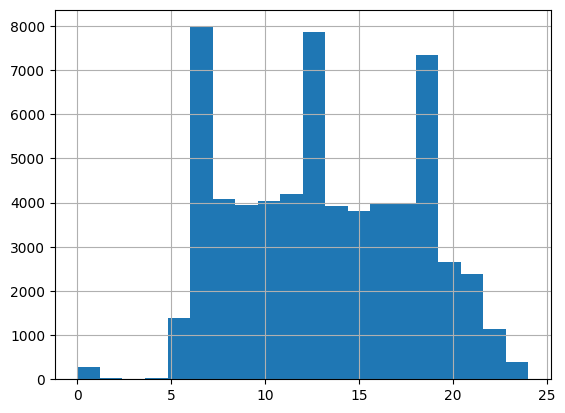

In [50]:
X['DepTime_Hour'].hist(bins=20)

<Axes: >

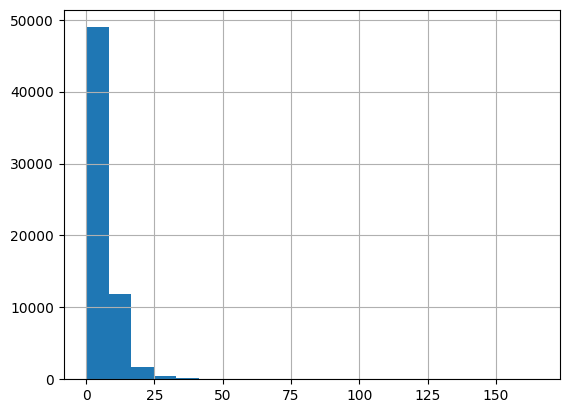

In [51]:
X['TaxiIn'].hist(bins=20)

<Axes: >

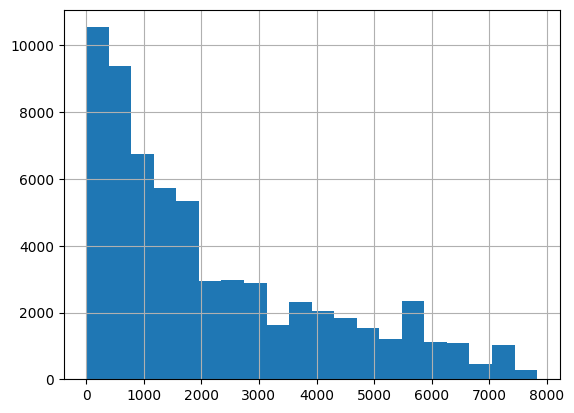

In [52]:
X['FlightNum'].hist(bins=20)

Какую проблему вы наблюдаете на этих графиках? Как масштабирование поможет её исправить?

Некоторые из признаков в нашем датасете являются категориальными. Типичным подходом к работе с ними является бинарное, или [one-hot-кодирование](https://en.wikipedia.org/wiki/One-hot).

Реализуйте функцию transform_data, которая принимает на вход DataFrame с признаками и выполняет следующие шаги:
1. Замена пропущенных значений на нули для вещественных признаков и на строки 'nan' для категориальных.
2. Масштабирование вещественных признаков с помощью [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).
3. One-hot-кодирование категориальных признаков с помощью [DictVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.DictVectorizer.html) или функции [pd.get_dummies](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html).

Метод должен возвращать преобразованный DataFrame, который должна состоять из масштабированных вещественных признаков и закодированных категориальных (исходные признаки должны быть исключены из выборки).

In [53]:
from sklearn.preprocessing import StandardScaler

def transform_data(X):
    numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
    categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
    
    X_transformed = X.copy()
    X_transformed[numeric_cols] = X_transformed[numeric_cols].fillna(0)
    X_transformed[categorical_cols] = X_transformed[categorical_cols].fillna('nan')
    
    scaler = StandardScaler()
    X_numeric_scaled = scaler.fit_transform(X_transformed[numeric_cols])
    X_numeric_df = pd.DataFrame(X_numeric_scaled, columns=numeric_cols, index=X_transformed.index)
    
    X_categorical = pd.get_dummies(X_transformed[categorical_cols])
    
    result = pd.concat([X_numeric_df, X_categorical], axis=1)
    
    return result

Примените функцию transform_data к данным. Сколько признаков получилось после преобразования?

In [54]:
X_transformed = transform_data(X)
print(f"Количество признаков после преобразования: {X_transformed.shape[1]}")

Количество признаков после преобразования: 632


**16. (0.5 балла)** Разбейте выборку и вектор целевой переменной на обучение и контроль в отношении 70/30 (для этого можно использовать, например, функцию [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html)). 

In [55]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.3, random_state=42)

print(f"Размер обучающей выборки: {X_train.shape}")
print(f"Размер тестовой выборки: {X_test.shape}")

Размер обучающей выборки: (44382, 632)
Размер тестовой выборки: (19022, 632)


### Scikit-learn

<img src = "https://pp.vk.me/c4534/u35727827/93547647/x_d31c4463.jpg">
Теперь, когда мы привели данные к пригодному виду, попробуем решить задачу при помощи метода наименьших квадратов. Напомним, что данный метод заключается в оптимизации функционала $MSE$:

$$MSE(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 \to \min_{w},$$

где $\{ (x_i, y_i ) \}_{i=1}^l$ — обучающая выборка, состоящая из $l$ пар объект-ответ.

Заметим, что решение данной задачи уже реализовано в модуле sklearn в виде класса [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression).

**17. (0.5 балла)** Обучите линейную регрессию на 1000 объектах из обучающей выборки и выведите значения $MSE$ и $R^2$ на этой подвыборке и контрольной выборке (итого 4 различных числа). Проинтерпретируйте полученный результат — насколько качественные прогнозы строит полученная модель? Какие проблемы наблюдаются в модели?

**Подсказка**: изучите значения полученных коэффициентов $w$, сохраненных в атрибуте coef_ объекта LinearRegression.

In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X_train_small = X_train.iloc[:1000]
y_train_small = y_train.iloc[:1000]

model = LinearRegression()
model.fit(X_train_small, y_train_small)

y_pred_train = model.predict(X_train_small)

y_pred_test = model.predict(X_test)

mse_train = mean_squared_error(y_train_small, y_pred_train)
r2_train = r2_score(y_train_small, y_pred_train)

mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print(f"На подвыборке из 1000 объектов:")
print(f"MSE: {mse_train:.2f}")
print(f"R²: {r2_train:.4f}")
print()
print(f"На контрольной выборке:")
print(f"MSE: {mse_test:.2f}")
print(f"R²: {r2_test:.4f}")
print()
print(f"Размер коэффициентов модели: {model.coef_.shape}")
print(f"Максимальный по модулю коэффициент: {np.max(np.abs(model.coef_)):.2f}")

На подвыборке из 1000 объектов:
MSE: 564.32
R²: 0.4675

На контрольной выборке:
MSE: 1549.31
R²: -0.1582

Размер коэффициентов модели: (632,)
Максимальный по модулю коэффициент: 173.99


Для решения описанных вами в предыдущем пункте проблем используем L1- или L2-регуляризацию, тем самым получив Lasso и Ridge регрессии соответственно и изменив оптимизационную задачу одним из следующих образов:
$$MSE_{L1}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_1 \to \min_{w},$$
$$MSE_{L2}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_2^2 \to \min_{w},$$

где $\alpha$ — коэффициент регуляризации. Один из способов его подбора заключается в переборе некоторого количества значений и оценке качества на кросс-валидации для каждого из них, после чего выбирается значение, для которого было получено наилучшее качество.

__18. (1 балл) __ Обучение линейной регрессии.



Обучите линейную регрессию с $L_1$ (Lasso) и $L_2$ (Ridge) регуляризаторами (используйте параметры по умолчанию). Посмотрите, какое количество коэффициентов близко к 0 (степень близости к 0 определите сами из разумных пределов). Постройте график зависимости числа ненулевых коэффициентов от коэффицента регуляризации (перебирайте значения по логарифмической сетке от $10^{-3}$ до $10^3$). Согласуются ли результаты с вашими ожиданиями?

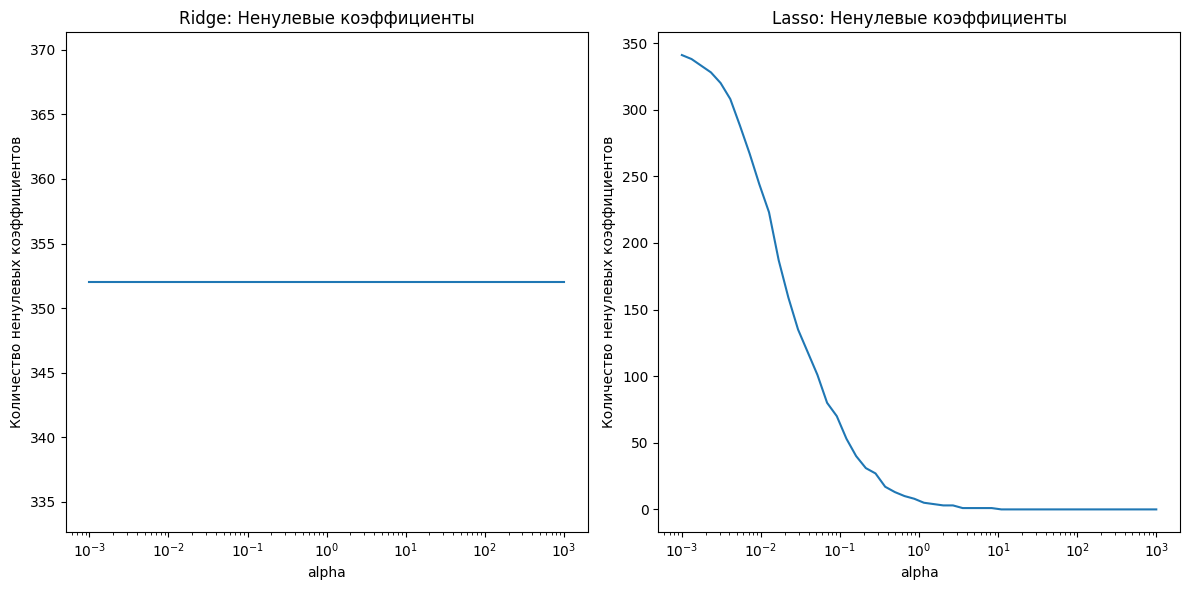

При alpha=0.001000:
  Ridge ненулевых: 352
  Lasso ненулевых: 341

При alpha=1000.000000:
  Ridge ненулевых: 352
  Lasso ненулевых: 0


In [60]:
import matplotlib.pyplot as plt

alphas = np.logspace(-3, 3, 50)
ridge_nonzero_counts = []
lasso_nonzero_counts = []

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train_small, y_train_small)
    ridge_nonzero_counts.append(np.sum(np.abs(ridge.coef_) > 1e-6))
    
    lasso = Lasso(alpha=alpha, max_iter=50000, tol=0.001)
    lasso.fit(X_train_small, y_train_small)
    lasso_nonzero_counts.append(np.sum(np.abs(lasso.coef_) > 1e-6))

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(alphas, ridge_nonzero_counts)
plt.xscale('log')
plt.title('Ridge: Ненулевые коэффициенты')
plt.xlabel('alpha')
plt.ylabel('Количество ненулевых коэффициентов')

plt.subplot(1, 2, 2)
plt.plot(alphas, lasso_nonzero_counts)
plt.xscale('log')
plt.title('Lasso: Ненулевые коэффициенты')
plt.xlabel('alpha')
plt.ylabel('Количество ненулевых коэффициентов')

plt.tight_layout()
plt.show()

print(f"При alpha={alphas[0]:.6f}:")
print(f"  Ridge ненулевых: {ridge_nonzero_counts[0]}")
print(f"  Lasso ненулевых: {lasso_nonzero_counts[0]}")

print(f"\nПри alpha={alphas[-1]:.6f}:")
print(f"  Ridge ненулевых: {ridge_nonzero_counts[-1]}")
print(f"  Lasso ненулевых: {lasso_nonzero_counts[-1]}")

Посчитайте для Ridge-регрессии следующие метрики: $RMSE$, $MAE$, $R^2$.

In [62]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

ridge_best = Ridge()
ridge_best.fit(X_train_small, y_train_small)

y_pred_ridge = ridge_best.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
mae = mean_absolute_error(y_test, y_pred_ridge)
r2 = r2_score(y_test, y_pred_ridge)

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R²: {r2:.4f}")

RMSE: 37.22
MAE: 20.62
R²: -0.0355


Подберите на обучающей выборке для Ridge-регрессии коэффициент регуляризации (перебирайте значения по логарифмической сетке от $10^{-3}$ до $10^3$) для каждой из метрик при помощи кросс-валидации c 5 фолдами на тех же 1000 объектах. Для этого воспользуйтесь GridSearchCV и KFold из sklearn. Постройте графики зависимости фукнции потерь от коэффициента регуляризации. Посчитайте те же метрики снова. Заметно ли изменилось качество?

Для выполнения данного задания вам могут понадобиться реализованные в библиотеке объекты [LassoCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html), [RidgeCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html) и [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.KFold.html).

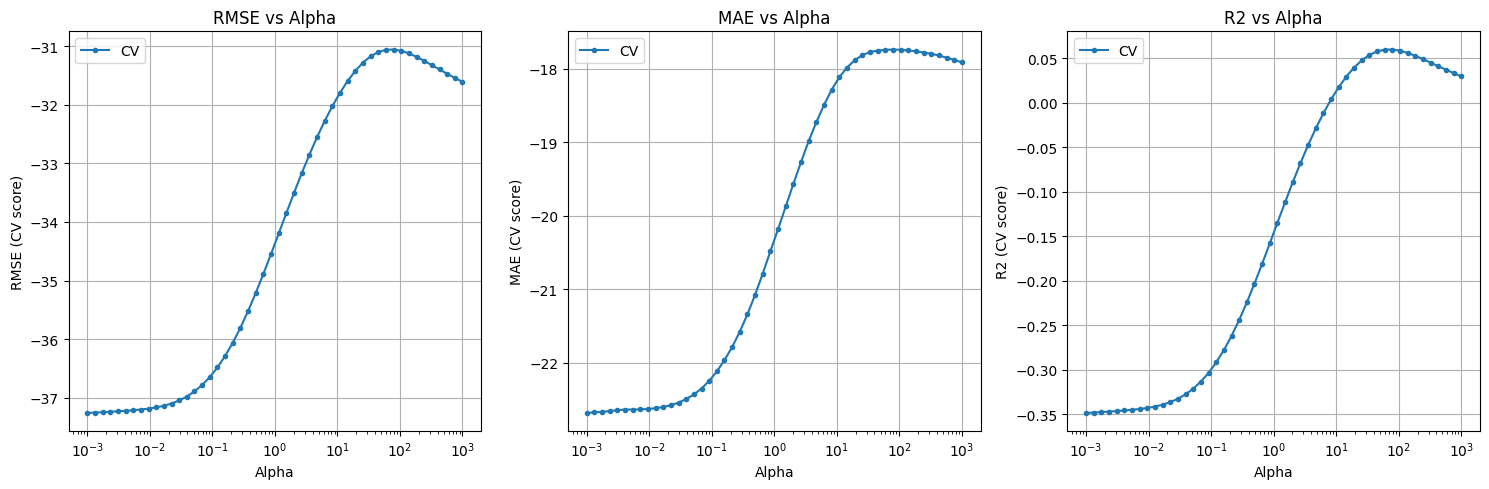

Сравнение качества моделей:

1. Обычная линейная регрессия (вывод из предыдущего задания):
   MSE: 1549.31, R²: -0.1582, RMSE: 39.36

2. Ridge-регрессия (alpha=1.0 по умолчанию (выводиз предыдущего задания)):
   RMSE: 37.22, MAE: 20.62, R²: -0.0355

3. Ridge-регрессия с подобранным alpha (GridSearchCV):

   RMSE (alpha=79.060432):
   RMSE: 35.36, MAE: 18.44, R²: 0.0652

   MAE (alpha=79.060432):
   RMSE: 35.36, MAE: 18.44, R²: 0.0652

   R2 (alpha=79.060432):
   RMSE: 35.36, MAE: 18.44, R²: 0.0652

Сравнение улучшений:
RMSE: 37.22 → 35.36 (изменение: -4.99%)
R²: -0.0355 → 0.0652 (изменение: +283.85%)


In [64]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

alphas = np.logspace(-3, 3, 50)
ridge = Ridge()
kf = KFold(n_splits=5, shuffle=True, random_state=42)

scoring_metrics = {'RMSE': 'neg_root_mean_squared_error',
                   'MAE': 'neg_mean_absolute_error', 
                   'R2': 'r2'}

best_alphas = {}
cv_scores = {}

for metric_name, scoring in scoring_metrics.items():
    grid_search = GridSearchCV(ridge, {'alpha': alphas}, 
                               cv=kf, scoring=scoring, refit=True)
    grid_search.fit(X_train_small, y_train_small)
    
    best_alphas[metric_name] = grid_search.best_params_['alpha']
    cv_scores[metric_name] = {
        'test_scores': grid_search.cv_results_['mean_test_score']
    }

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for idx, (metric_name, scores) in enumerate(cv_scores.items()):
    ax = axes[idx]
    ax.plot(alphas, scores['test_scores'], label='CV', marker='o', markersize=3)
    ax.set_xscale('log')
    ax.set_xlabel('Alpha')
    ax.set_ylabel(f'{metric_name} (CV score)')
    ax.set_title(f'{metric_name} vs Alpha')
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()

print("Сравнение качества моделей:")
print("\n1. Обычная линейная регрессия (вывод из предыдущего задания):")
print(f"   MSE: 1549.31, R²: -0.1582, RMSE: {np.sqrt(1549.31):.2f}")

print("\n2. Ridge-регрессия (alpha=1.0 по умолчанию (выводиз предыдущего задания)):")
print(f"   RMSE: 37.22, MAE: 20.62, R²: -0.0355")

print("\n3. Ridge-регрессия с подобранным alpha (GridSearchCV):")

for metric_name, alpha in best_alphas.items():
    model = Ridge(alpha=alpha)
    model.fit(X_train_small, y_train_small)
    
    y_pred = model.predict(X_test)
    
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"\n   {metric_name} (alpha={alpha:.6f}):")
    print(f"   RMSE: {rmse:.2f}, MAE: {mae:.2f}, R²: {r2:.4f}")

ridge_default = Ridge(alpha=1.0)
ridge_default.fit(X_train_small, y_train_small)
y_pred_default = ridge_default.predict(X_test)

best_metric = 'R2'
best_alpha = best_alphas[best_metric]
best_model = Ridge(alpha=best_alpha)
best_model.fit(X_train_small, y_train_small)
y_pred_best = best_model.predict(X_test)

rmse_default = np.sqrt(mean_squared_error(y_test, y_pred_default))
r2_default = r2_score(y_test, y_pred_default)

rmse_best = np.sqrt(mean_squared_error(y_test, y_pred_best))
r2_best = r2_score(y_test, y_pred_best)

print(f"\nСравнение улучшений:")
print(f"RMSE: {rmse_default:.2f} → {rmse_best:.2f} (изменение: {(rmse_best - rmse_default)/rmse_default*100:+.2f}%)")
print(f"R²: {r2_default:.4f} → {r2_best:.4f} (изменение: {(r2_best - r2_default)/abs(r2_default)*100:+.2f}%)")

__19. (0.5 балла)__ Поиск объектов-выбросов


Как известно, MSE сильно штрафует за большие ошибки на объектах-выбросах. С помощью cross_val_predict сделайте Out-of-Fold предсказания для обучающей выборки. Посчитайте ошибки и посмотрите на их распределение (plt.hist). Что вы видите?

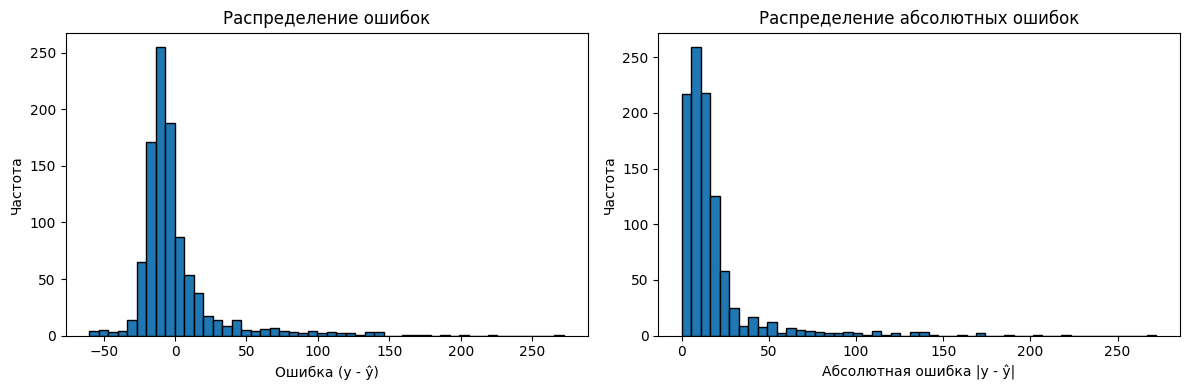

Средняя ошибка: 0.00
Медиана ошибки: -7.41
Стандартное отклонение: 30.77
Максимальная положительная ошибка: 272.23
Максимальная отрицательная ошибка: -60.05
Процент ошибок > 50 мин: 6.20%
Процент ошибок > 100 мин: 2.30%


In [65]:
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt

model = Ridge(alpha=best_alpha)
oof_predictions = cross_val_predict(model, X_train_small, y_train_small, cv=5, method='predict')
errors = y_train_small - oof_predictions

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(errors, bins=50, edgecolor='black')
plt.xlabel('Ошибка (y - ŷ)')
plt.ylabel('Частота')
plt.title('Распределение ошибок')

plt.subplot(1, 2, 2)
plt.hist(np.abs(errors), bins=50, edgecolor='black')
plt.xlabel('Абсолютная ошибка |y - ŷ|')
plt.ylabel('Частота')
plt.title('Распределение абсолютных ошибок')

plt.tight_layout()
plt.show()

print(f"Средняя ошибка: {np.mean(errors):.2f}")
print(f"Медиана ошибки: {np.median(errors):.2f}")
print(f"Стандартное отклонение: {np.std(errors):.2f}")
print(f"Максимальная положительная ошибка: {np.max(errors):.2f}")
print(f"Максимальная отрицательная ошибка: {np.min(errors):.2f}")
print(f"Процент ошибок > 50 мин: {(np.sum(np.abs(errors) > 50) / len(errors) * 100):.2f}%")
print(f"Процент ошибок > 100 мин: {(np.sum(np.abs(errors) > 100) / len(errors) * 100):.2f}%")